In [1]:
%load_ext rpy2.ipython

In [16]:
%%R
library(pcalg)
library(SMPracticals)

In [3]:
%%R
data(mathmarks)

In [4]:
%%R
head(mathmarks)

  mechanics vectors algebra analysis statistics
1        77      82      67       67         81
2        63      78      80       70         81
3        75      73      71       66         81
4        55      72      63       70         68
5        63      63      65       70         63
6        53      61      72       64         73


In [5]:
%%R
suffStat <- list(C=cor(mathmarks), n=nrow(mathmarks))
suffStat

$C
           mechanics   vectors   algebra  analysis statistics
mechanics  1.0000000 0.5534052 0.5467511 0.4093920  0.3890993
vectors    0.5534052 1.0000000 0.6096447 0.4850813  0.4364487
algebra    0.5467511 0.6096447 1.0000000 0.7108059  0.6647357
analysis   0.4093920 0.4850813 0.7108059 1.0000000  0.6071743
statistics 0.3890993 0.4364487 0.6647357 0.6071743  1.0000000

$n
[1] 88



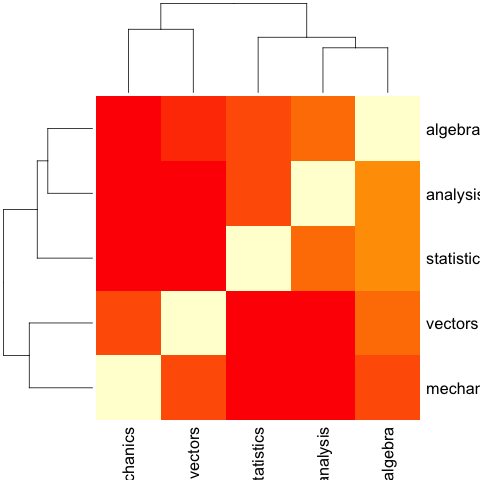

In [11]:
%%R
heatmap(suffStat$C)

In [18]:
%%R
solve(suffStat$C)

              mechanics     vectors    algebra     analysis  statistics
mechanics   1.603628557 -0.55979547 -0.5089654  0.003006876 -0.04314697
vectors    -0.559795466  1.80219926 -0.6576078 -0.154737540 -0.03766343
algebra    -0.508965361 -0.65760781  3.0428206 -1.111749009 -0.86259603
analysis    0.003006876 -0.15473754 -1.1117490  2.178001877 -0.51704244
statistics -0.043146968 -0.03766343 -0.8625960 -0.517042437  1.92055989


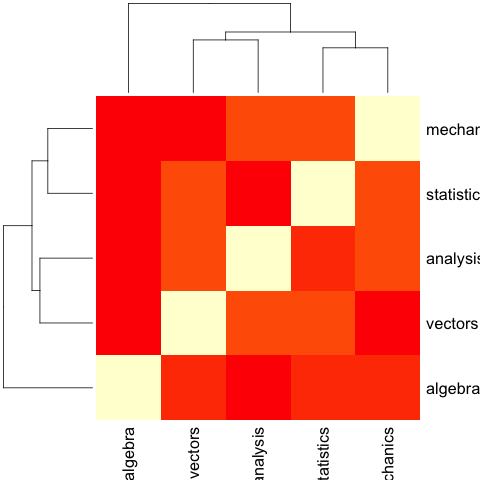

In [19]:
%%R
heatmap(solve(suffStat$C))

In [6]:
%%R
pc.fit <- pc(suffStat, indepTest=gaussCItest, p=ncol(mathmarks),alpha=0.005)

In [7]:
%%R
pc.fit

Object of class 'pcAlgo', from Call:
pc(suffStat = suffStat, indepTest = gaussCItest, alpha = 0.005, 
    p = ncol(mathmarks))
Number of undirected edges:  1 
Number of directed edges:    3 
Total number of edges:       4 


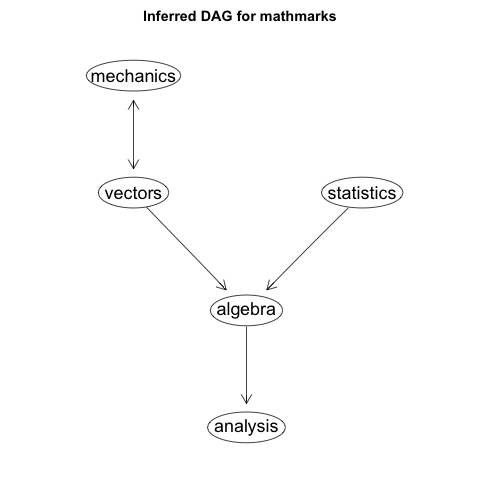

In [13]:
%%R
library(Rgraphviz)
plot(pc.fit,labels=colnames(mathmarks),main="Inferred DAG for mathmarks")

In [14]:
%%R
library(MVN)

In [15]:
%%R
mvn(mathmarks)

$multivariateNormality
             Test          Statistic            p value Result
1 Mardia Skewness   62.4728739243107 0.0029096791432281     NO
2 Mardia Kurtosis 0.0569931473421283  0.954550653898797    YES
3             MVN               <NA>               <NA>     NO

$univariateNormality
          Test   Variable Statistic   p value Normality
1 Shapiro-Wilk mechanics     0.9724    0.0571    YES   
2 Shapiro-Wilk  vectors      0.9931    0.9276    YES   
3 Shapiro-Wilk  algebra      0.9821    0.2637    YES   
4 Shapiro-Wilk  analysis     0.9425    0.0007    NO    
5 Shapiro-Wilk statistics    0.9645    0.0163    NO    

$Descriptives
            n     Mean  Std.Dev Median Min Max  25th  75th       Skew
mechanics  88 38.95455 17.48622   41.5   0  77 30.00 49.25 -0.3186623
vectors    88 50.59091 13.14695   51.0   9  82 42.00 60.00 -0.2194024
algebra    88 50.60227 10.62478   50.0  15  80 45.00 57.25 -0.3124805
analysis   88 46.68182 14.84521   49.0   9  70 35.75 57.00 -0.6181919
st